# **使用CNN模型訓練Mnist手寫數字集**

# **載入相關套件**

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [4]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [6]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [7]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [13]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 2s - loss: 0.4840 - accuracy: 0.8467 - val_loss: 0.0970 - val_accuracy: 0.9705
Epoch 2/20
160/160 - 1s - loss: 0.1386 - accuracy: 0.9585 - val_loss: 0.0626 - val_accuracy: 0.9809
Epoch 3/20
160/160 - 1s - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 4/20
160/160 - 1s - loss: 0.0813 - accuracy: 0.9759 - val_loss: 0.0450 - val_accuracy: 0.9866
Epoch 5/20
160/160 - 2s - loss: 0.0672 - accuracy: 0.9805 - val_loss: 0.0432 - val_accuracy: 0.9873
Epoch 6/20
160/160 - 1s - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 7/20
160/160 - 1s - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0355 - val_accuracy: 0.9895
Epoch 8/20
160/160 - 1s - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 9/20
160/160 - 1s - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0324 - val_accuracy: 0.9904
Epoch 10/20
160/160 - 1s - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0339 - val_accuracy: 0.9902

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [15]:
#show_train_history('acc','val_acc')

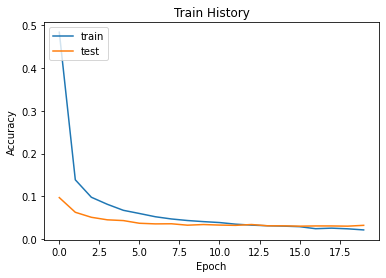

In [16]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9929


0.992900013923645

# 預測結果

In [18]:
prediction=model.predict_classes(x_Test4D_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [20]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

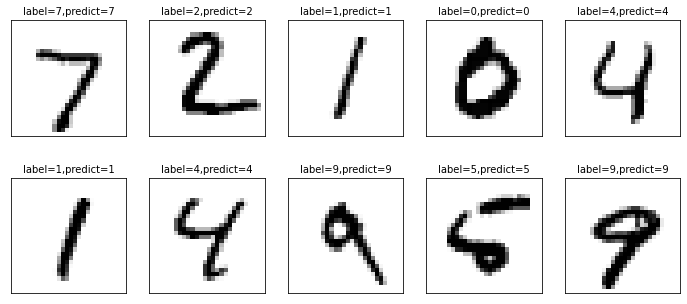

In [21]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [22]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1129,1,1,1,0,2,1,0,0
2,0,0,1025,0,1,0,0,3,3,0
3,0,0,1,1000,0,5,0,2,2,0
4,0,0,0,0,980,0,0,0,1,1
5,1,0,0,4,0,886,1,0,0,0
6,1,1,0,0,2,3,950,0,1,0
7,0,2,1,0,0,0,0,1022,1,2
8,2,0,1,0,0,0,0,2,968,1


In [23]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [24]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
